In [48]:
import pandas as pd


class Stock:
    def __init__(self, file):

        self.file = file
        
        self.df = pd.read_csv(file,parse_dates=['Datetime'],
                    index_col='Datetime')
        self.df['hour'] = self.df.index.hour
        self.grouped = self.df.groupby('hour').apply(lambda x: (x['Close'] - x['Open']).mean())
        self.volume_mean = self.df.groupby('hour')["Volume"].mean().to_frame(name="mean_volume")
        self.interhour = self.df.groupby('hour').apply(lambda x: (x['High'] - x['Low']).mean())


In [49]:
def add_df():
    stocks = {}
    for stock in ('IWM', 'NVDA', 'QQQ', 'SPY', 'TSLA'):
        file = f'csvs/{stock}.csv'
        stocks.update({stock: Stock(file)})
    return stocks
        

In [50]:
stocks = add_df()

C:\Users\shmue\AppData\Local\Temp\ipykernel_32360\2255537772.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.df.groupby('hour').apply(lambda x: (x['Close'] - x['Open']).mean())
C:\Users\shmue\AppData\Local\Temp\ipykernel_32360\2255537772.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.interhour = self.df.groupby('hour').apply(lambda x: (x['High'] - x['Low']).mean())
C:\Use

In [39]:
grouped_hour = pd.DataFrame(columns=['hour'])
for name, stock in stocks.items():
    stock_df = stock.grouped.to_frame() if isinstance(stock.grouped, pd.Series) else stock.grouped  # Ensure it's a DataFrame
    if not stock_df.empty:
        stock_df = stock_df.rename(columns={col: f"{name}" for col in stock_df.columns if col != "hour"})  # Rename columns with stock name
        grouped_hour =  grouped_hour.merge(stock_df, on='hour', how='outer')
    
    print(grouped_hour)

   hour       IWM
0     9 -0.001999
1    10 -0.001845
2    11 -0.001687
3    12  0.000539
4    13 -0.000966
5    14  0.000098
6    15  0.003445
   hour       IWM      NVDA
0     9 -0.001999  0.008836
1    10 -0.001845 -0.004536
2    11 -0.001687 -0.003735
3    12  0.000539  0.002539
4    13 -0.000966 -0.001443
5    14  0.000098  0.002254
6    15  0.003445  0.002810
   hour       IWM      NVDA       QQQ
0     9 -0.001999  0.008836  0.001102
1    10 -0.001845 -0.004536 -0.000335
2    11 -0.001687 -0.003735 -0.001493
3    12  0.000539  0.002539  0.000727
4    13 -0.000966 -0.001443  0.002125
5    14  0.000098  0.002254  0.001195
6    15  0.003445  0.002810  0.001733
   hour       IWM      NVDA       QQQ       SPY
0     9 -0.001999  0.008836  0.001102  0.001229
1    10 -0.001845 -0.004536 -0.000335  0.002479
2    11 -0.001687 -0.003735 -0.001493  0.000157
3    12  0.000539  0.002539  0.000727 -0.000699
4    13 -0.000966 -0.001443  0.002125  0.001515
5    14  0.000098  0.002254  0.001195  0

In [40]:
grouped_hour.columns

Index(['hour', 'IWM', 'NVDA', 'QQQ', 'SPY', 'TSLA'], dtype='object')

In [41]:
grouped_hour['joined'] = grouped_hour.drop(columns=["hour"]).mean(axis=1)

In [42]:
print(grouped_hour)

   hour       IWM      NVDA       QQQ       SPY      TSLA    joined
0     9 -0.001999  0.008836  0.001102  0.001229 -0.030839 -0.004334
1    10 -0.001845 -0.004536 -0.000335  0.002479 -0.008382 -0.002524
2    11 -0.001687 -0.003735 -0.001493  0.000157 -0.002356 -0.001823
3    12  0.000539  0.002539  0.000727 -0.000699  0.007449  0.002111
4    13 -0.000966 -0.001443  0.002125  0.001515 -0.005314 -0.000817
5    14  0.000098  0.002254  0.001195  0.000976 -0.006198 -0.000335
6    15  0.003445  0.002810  0.001733  0.003957 -0.002997  0.001789


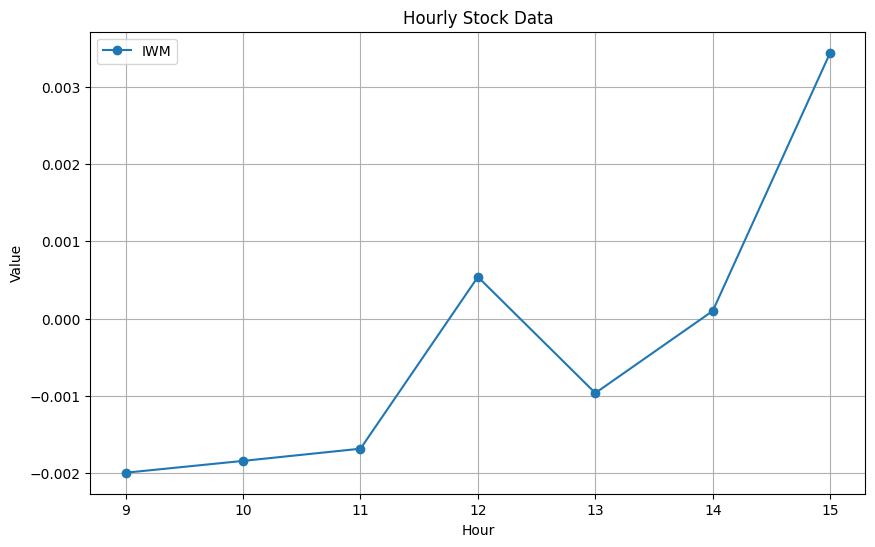

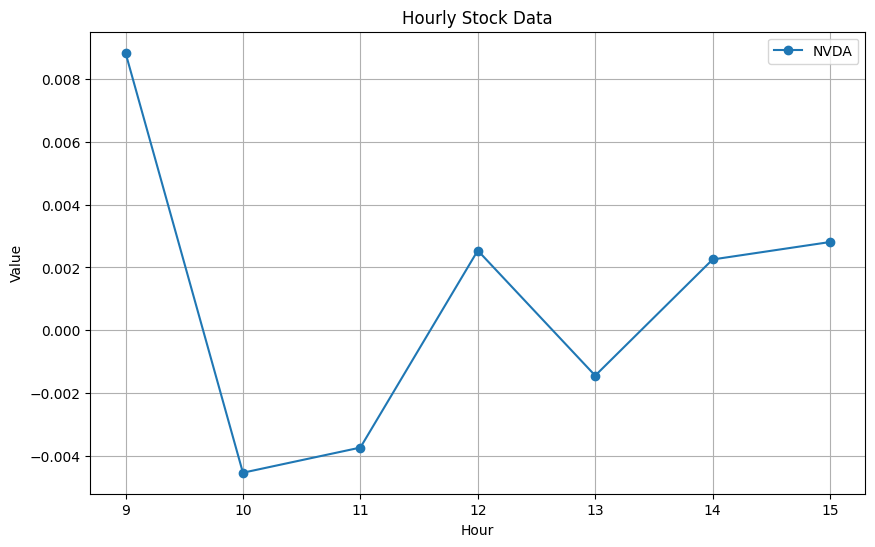

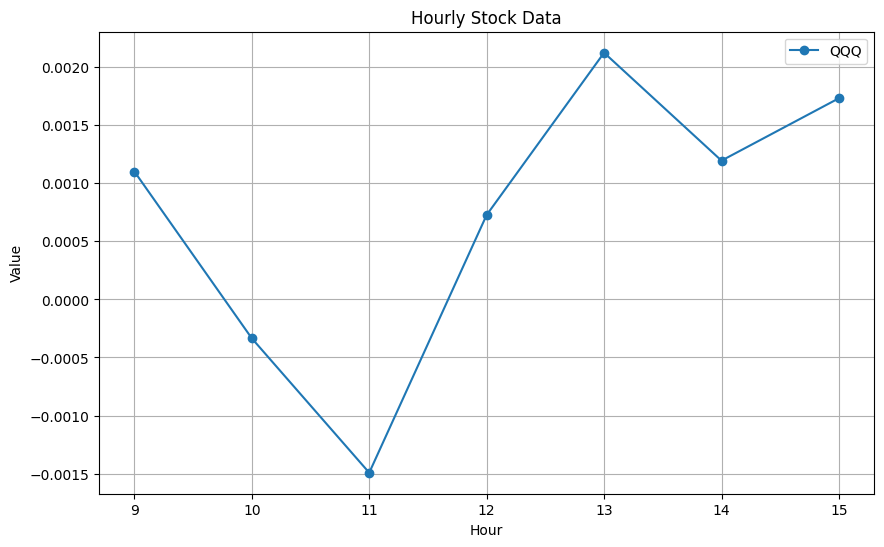

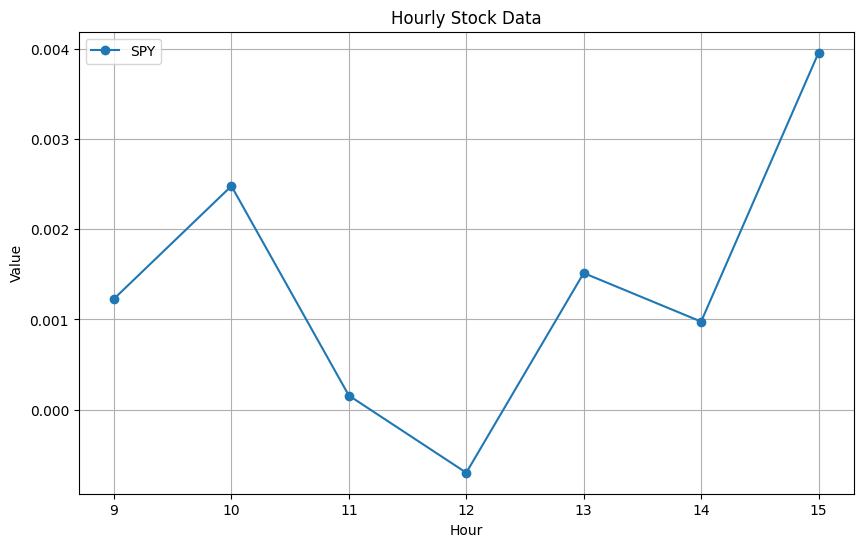

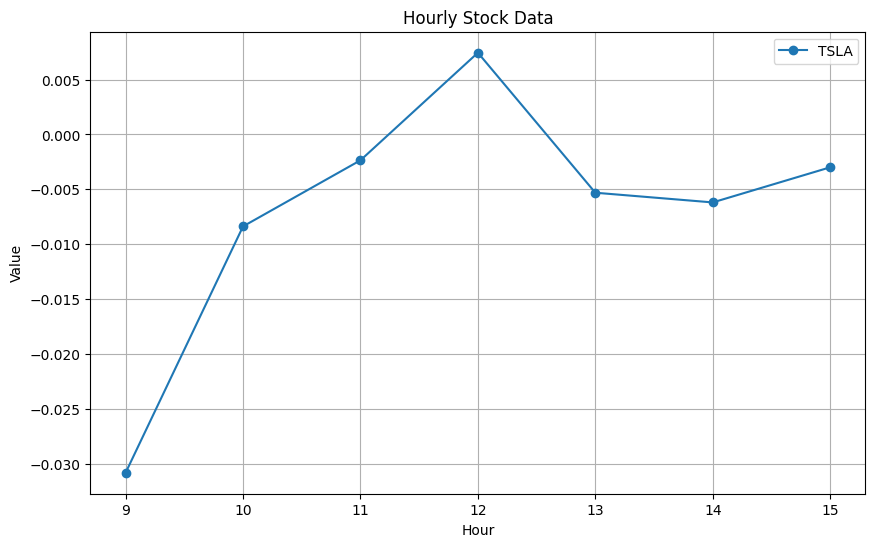

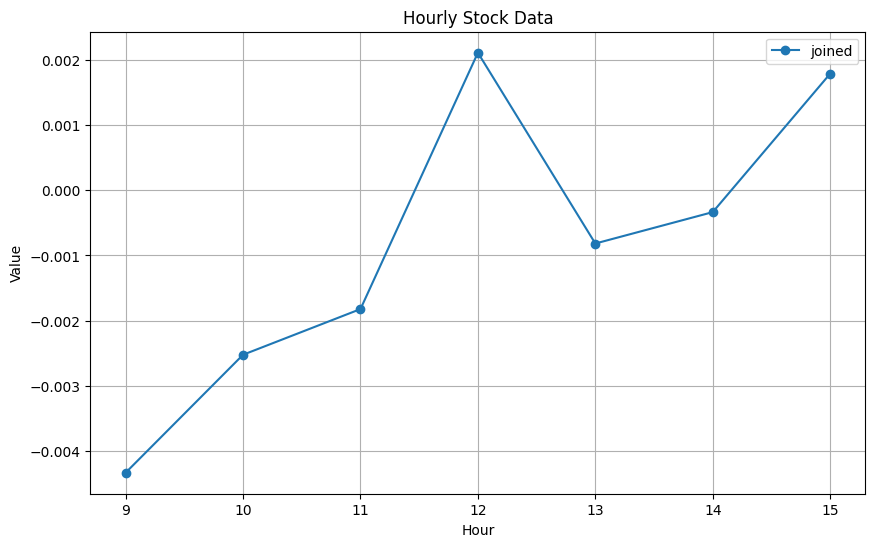

In [51]:
import matplotlib.pyplot as plt

# Exclude "hour" column from plotting
columns_to_plot = grouped_hour.columns.difference(["hour"])
for column in columns_to_plot:

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_hour["hour"], grouped_hour[column], marker='o', linestyle='-', label=column)

    plt.xlabel("Hour")
    plt.ylabel("Value")
    plt.title("Hourly Stock Data")
    plt.legend()  # Show legend for multiple columns
    plt.grid(True)
    plt.xticks(grouped_hour["hour"])  # Ensure all hours are visible
    plt.show()
